# Human Dataset Pre-processing and Analyzing

In [1]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score

In [2]:
human_data = load_dataset("umarigan/turkish_wikipedia_dataset_NER")

In [3]:
data = pd.DataFrame(human_data['train'])
data.head()

,id,text,title,ner,cleaned_ners,cleaned_new
0,16,Film şu anlamlara gelebilir: * Camlara yapıştı...,Film (anlam ayrımı),"[{'end': 188, 'entity': 'I-ORG', 'index': 38, ...","[Sam, Bec, To, Film, İngiltere]","[Sam, Bec, İngiltere, Film]"
1,30,"Bolşevik, çoğunluktan yana anlamına gelen Rusç...",Bolşevizm,"[{'end': 85, 'entity': 'B-ORG', 'index': 17, '...","[Rusya, Sosyal, Demokrat, İşçi, Partisi, nin, ...","[İşçi, Ekim, Londra, Partisi, Brüksel, Birliği..."
2,39,küçükresim|200px|Cinepaint ekran yakalama görü...,Cinepaint,"[{'end': 55, 'entity': 'B-ORG', 'index': 15, '...","[Cin, Film, Gi, Cin]","[Film, Cin]"
3,24,Linux (telaffuz: Lin-uks); Linux çekirdeğine d...,Linux,"[{'end': 32, 'entity': 'B-ORG', 'index': 11, '...","[Uni, G, Genel, Kamu, Lisans, Linux, Vakfı, Li...","[Lin, bülten, Uni, Richard, Stal, Lisans, Gene..."
4,10,"Cengiz Han (doğum adıyla Temuçin, – 18 Ağustos...",Cengiz Han,"[{'end': 6, 'entity': 'B-PER', 'index': 1, 'sc...","[Cengiz, Han, İmparatorluğu, Cengiz, Han, Orta...","[Nehri, Bulgar, Cengiz, Orta, Xia, Tarihi, İmp..."


In [4]:
# We do not need the NER tags nor the title, so we will drop them
data = data.drop(columns=['title', 'ner', 'cleaned_ners', 'cleaned_new'])
data.columns

Index(['id', 'text'], dtype='object')

In [5]:
# We will now create new columns that will contain the number of characters and words in the text
data['text_length'] = data['text'].apply(lambda x: len(x))
data['num_words'] = data['text'].apply(lambda x: len(x.split()))
data.head()

,id,text,text_length,num_words
0,16,Film şu anlamlara gelebilir: * Camlara yapıştı...,530,69
1,30,"Bolşevik, çoğunluktan yana anlamına gelen Rusç...",8924,1096
2,39,küçükresim|200px|Cinepaint ekran yakalama görü...,253,33
3,24,Linux (telaffuz: Lin-uks); Linux çekirdeğine d...,17678,2243
4,10,"Cengiz Han (doğum adıyla Temuçin, – 18 Ağustos...",105641,13853


In [6]:
data.shape

(265000, 4)

In [7]:
data.describe()

,id,text_length,num_words
count,2.650000e+05,265000.000000,265000.000000
mean,9.909467e+05,2444.496611,335.448955
std,7.190184e+05,5347.812227,732.749545
min,1.000000e+01,16.000000,2.000000
25%,2.801188e+05,486.000000,61.000000
50%,9.630830e+05,1053.000000,138.000000
75%,1.574292e+06,2343.000000,319.000000
max,2.161594e+06,429224.000000,62923.000000


In [8]:
data.isnull().sum()

id             0
text           0
text_length    0
num_words      0
dtype: int64

In [9]:
# Average number of words in the texts
data['num_words'].mean()

335.4489547169811

In [10]:
# The minimum and maximum number of words in all texts
data['num_words'].min(), data['num_words'].max()

(2, 62923)

In [11]:
# Average number of characters in the texts
data['text_length'].mean()

2444.4966113207547

In [12]:
# The minimum and maximum number of characters in all texts
data['text_length'].min(), data['text_length'].max()

(16, 429224)

We need to check the data thoroughly before constructing the AI generated dataset so that the datasets are similar in some context.

## EDA

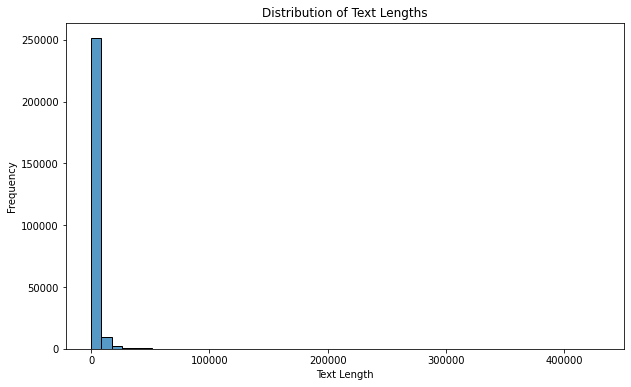

In [13]:
# Text Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=50)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

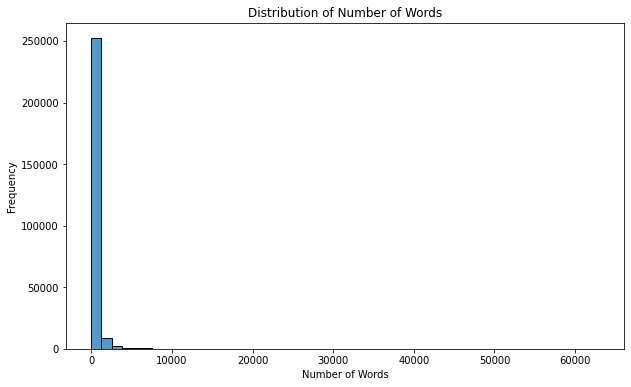

In [14]:
# Number of Words Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['num_words'], bins=50)
plt.title('Distribution of Number of Words')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

As it can be seen here most of the texts have less than 4000 words and 50000 characters. Rest of the data can be marked as corrupted and dropped. The reason for this is that some algorithms have a token limit which 50000 characters can be challenging enough. So it is the best to save computation time and efficiency. 

In [15]:
# Drop rows with more than 4000 words
data = data[data['num_words'] <= 4000]
data.shape

(263245, 4)

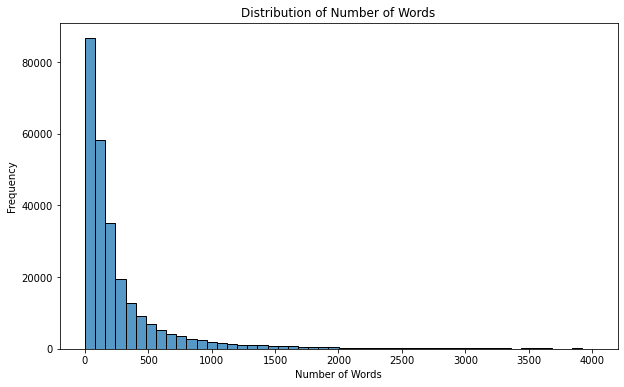

In [16]:
# Number of Words Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['num_words'], bins=50)
plt.title('Distribution of Number of Words')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

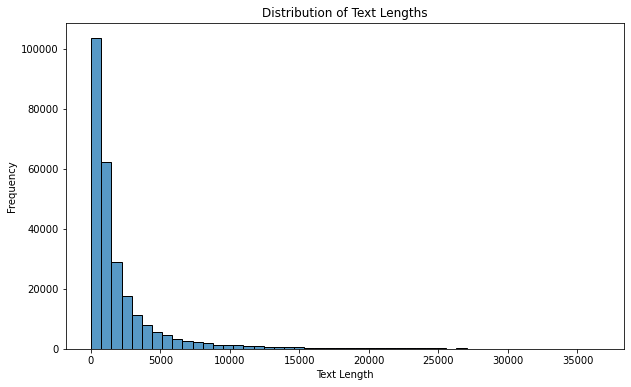

In [17]:
# Text Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=50)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [18]:
data.shape

(263245, 4)

In [19]:
data['num_words'].mean()

294.02148188949457

In [20]:
data['text_length'].mean()

2140.923945374081

It can be said that there were not many extremely long texts anyways from the shape of the dataset

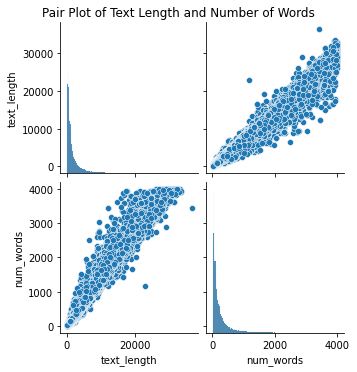

In [21]:
# Pair Plot
sns.pairplot(data[['text_length', 'num_words']])
plt.suptitle('Pair Plot of Text Length and Number of Words', y=1.02)
plt.show()

## AI Data

In [22]:
ai_data = pd.read_csv('augmented_data.csv')
ai_data.head()

,output
0,"Veri gizliliği , günümüzde hem bireylerin hem ..."
1,"Veri gizliliği , günümüzde hem bireylerin hem ..."
2,"Veri gizliliği , günümüzde hem bireylerin hem ..."
3,"Veri gizliliği , hem bireylerin hem de kurumla..."
4,"Veri gizliliği , günümüzde hem bireylerin hem ..."


In [23]:
# Function to remove specific characters that LLM produces when copied
def remove_characters(text):
    return re.sub(r'[#*]', '', text)

ai_data['output'] = ai_data['output'].apply(remove_characters)

In [24]:
# We will now create new columns that will contain the number of characters and words in the text
ai_data.rename(columns={'output': 'text'}, inplace=True)
ai_data['text_length'] = ai_data['text'].apply(lambda x: len(x))
ai_data['num_words'] = ai_data['text'].apply(lambda x: len(x.split()))
ai_data.head()

,text,text_length,num_words
0,"Veri gizliliği , günümüzde hem bireylerin hem ...",2718,371
1,"Veri gizliliği , günümüzde hem bireylerin hem ...",2746,374
2,"Veri gizliliği , günümüzde hem bireylerin hem ...",2718,371
3,"Veri gizliliği , hem bireylerin hem de kurumla...",2444,337
4,"Veri gizliliği , günümüzde hem bireylerin hem ...",2718,371


In [25]:
ai_data.shape

(7460, 3)

In [26]:
ai_data.describe()

,text_length,num_words
count,7460.000000,7460.000000
mean,2048.068633,306.306836
std,723.956386,107.822278
min,109.000000,20.000000
25%,1576.750000,238.000000
50%,2068.000000,306.000000
75%,2509.000000,368.000000
max,4114.000000,671.000000


In [27]:
ai_data.isnull().sum()

text           0
text_length    0
num_words      0
dtype: int64

In [28]:
# Average number of words in the texts
ai_data['num_words'].mean()

306.306836461126

In [29]:
# The minimum and maximum number of words in all texts
ai_data['num_words'].min(), data['num_words'].max()

(20, 4000)

In [30]:
# Average number of words in the texts
ai_data['text_length'].mean()

2048.0686327077747

In [31]:
# The minimum and maximum number of words in all texts
ai_data['text_length'].min(), ai_data['text_length'].max()

(109, 4114)

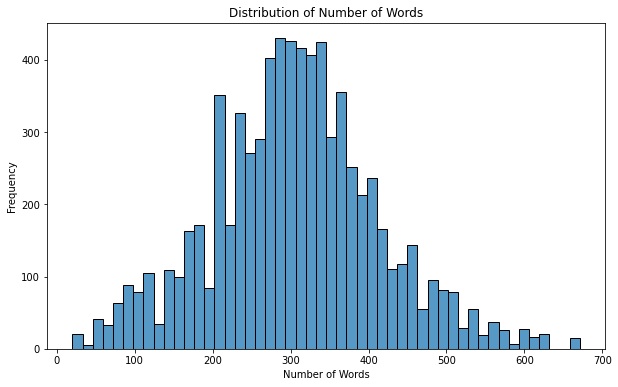

In [32]:
# Text Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(ai_data['num_words'], bins=50)
plt.title('Distribution of Number of Words')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

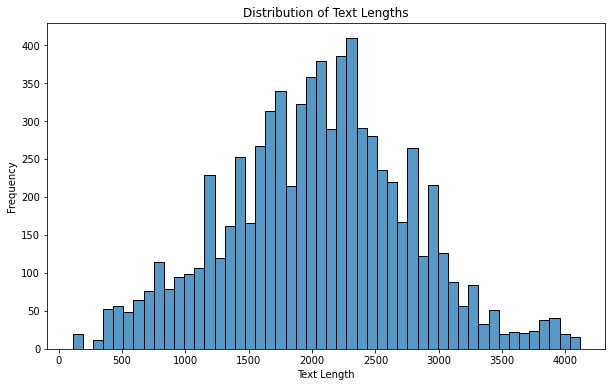

In [33]:
# Text Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(ai_data['text_length'], bins=50)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

The mean of human and ai datasets is close enough even though the distributions of length are completely dissimilar. Now let's try some baseline models to check if the mean is liable as a similarity metric.

## Training Baseline Models

In [35]:
# Import Augmentation Functions
%run data_augmentation.py

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Augmentation done. Check the 'augmented_data.csv' file.


In [36]:
df = pd.read_excel('ai_data.xlsx')
df['output'] = df['output'].apply(remove_characters)
df['text'] = df['output']
df = df.drop('output', axis=1)
df

,model,instruction,text
0,GPT-4o,Veri gizliliği sorununa etik bir çözüm önerin.,"Veri gizliliği, günümüzde hem bireylerin hem d..."
1,GPT-4o,Doğal Dil İşlemede kelime gömme kullanımını aç...,"Doğal Dil İşleme (NLP) alanında, kelime gömme ..."
2,GPT-4o,Cogging torku kavramını açıklayın.,"Cogging torku, elektrik motorları, özellikle d..."
3,GPT-4o,Bir inşaat şirketinin proje yöneticisi olduğun...,Bir büyük ölçekli konut projesinin proje yönet...
4,GPT-4o,Bitkilerde hücresel solunum sürecini açıklayın.,"Bitkilerde hücresel solunum, bitki hücrelerini..."
...,...,...,...
368,Claude 3 Sonnet,Yol Ayrımı şiirinin 200 kelime özeti yazın.,"Yol Ayrımı şiirinde şair, hayatın bir dönüm no..."
369,Claude 3 Sonnet,O her zaman ayı ziyaret etmek istemişti diyere...,O her zaman ayı ziyaret etmek istemişti. Küçük...
370,Claude 3 Sonnet,"Aşağıdaki girdiler verildiğinde, durumun avant...",Editöryal: Evden Çalışmanın İki Yüzü Günümüzde...
371,Claude 3 Sonnet,Küresel ısınma hakkında 300 kelimelik bir maka...,Küresel Isınma: Gezegenimizi Tehdit Eden Büyük...


In [37]:
# Split data into training and testing sets before augmentation
train_ai_df, test_ai_df = train_test_split(df, test_size=0.2, random_state=42)

# Augment training data only
augmented_texts = []
for index, row in train_ai_df.iterrows():
    text = row['text']
    # Apply multiple transformations
    for _ in range(5):  # Repeat each transformation 5 times
        augmented_texts.append(synonym_replacement(text, n=2))
        augmented_texts.append(random_insertion(text, n=3))
        augmented_texts.append(random_swap(text, n=2))
        augmented_texts.append(random_deletion(text, p=0.1))

augmented_df = pd.DataFrame(augmented_texts, columns=['text'])
augmented_df

,text
0,"Genç bir kız , ormanın derinliklerinde dolaşır..."
1,"Genç bir kız , ormanın derinliklerinde dolaşır..."
2,"Genç bir kız , ormanın derinliklerinde dolaşır..."
3,"bir kız , ormanın derinliklerinde dolaşırken b..."
4,"Genç bir kız , ormanın derinliklerinde dolaşır..."
...,...
5955,"Başlık Kayıp Anahtar Begüm , yıllardır büyük k..."
5956,"Başlık : Kayıp Anahtar Begüm , yıllardır bekle..."
5957,"Başlık : Kayıp Anahtar Begüm , yıllardır bekle..."
5958,"Başlık : Kayıp Anahtar Begüm , yıllardır bekle..."


In [38]:
# Combine augmented data with original training data
train_augmented_df = pd.concat([train_ai_df[['text']], augmented_df], ignore_index=True)

# Label data
train_augmented_df['label'] = 'ai'
test_ai_df['label'] = 'ai'
data['label'] = 'human'
train_human_df, test_human_df = train_test_split(data, test_size=0.2, random_state=42)
train_human_df = train_human_df.sample(n=8000, random_state=42)
test_human_df = test_human_df.sample(n=2000, random_state=42)

# Combine data
combined_train_df = pd.concat([train_augmented_df, train_human_df], ignore_index=True)
combined_test_df = pd.concat([test_ai_df, test_human_df], ignore_index=True)

columns_to_keep = ['text', 'label']
combined_train_df = combined_train_df[columns_to_keep]
combined_test_df = combined_test_df[columns_to_keep]

,text,label
0,"Doğu Afrika'da bir çiftçinin yaşam tarzı, ikli...",ai
1,"Dünya'nın klasikçi görüşü, genellikle Antik Yu...",ai
2,"\nKoronavirüs, solunum yolu enfeksiyonlarına n...",ai
3,"John Fitzgerald Kennedy, genellikle JFK olarak...",ai
4,"Nehir ve Kasaba\nBir nehir, kasabanın içinden ...",ai
...,...,...
2070,"Peter Trevor Powell (d. 1932 – ö.3 Ocak 2016),...",human
2071,Klasik Türk müziği sanatçısı Emel Sayının disk...,human
2072,"İsmail Hakkı Uzmay (d. 1881, Şumnu \- ö. 11 Te...",human
2073,"Bu Vatanın Çocukları, başrollerinde Yılmaz Gün...",human


In [48]:
combined_train_df

,text,label
0,"Genç bir kız, ormanın derinliklerinde dolaşırk...",ai
1,"Yapay zeka (AI), son yıllarda hızla gelişerek ...",ai
2,Yapay Zeka ve Makine Öğrenimi:\n\nYapay zekanı...,ai
3,Doğal ve yapay diller arasındaki farklar şunla...,ai
4,"Müşteri: Affedersiniz, hanımefendi?\n\nUçuş Gö...",ai
...,...,...
14253,küçükresim|300px|Antik kent İç kısımların duva...,human
14254,"Korsika derbisi (Fransızca: Derby Corse), Fran...",human
14255,"Flebit, ven enflamasyonunu tanımlayan bir teri...",human
14256,Standaard Wetteren Wetteren şehrinin futbol ku...,human


In [51]:
combined_test_df

,text,label
0,"Doğu Afrika'da bir çiftçinin yaşam tarzı, ikli...",ai
1,"Dünya'nın klasikçi görüşü, genellikle Antik Yu...",ai
2,"\nKoronavirüs, solunum yolu enfeksiyonlarına n...",ai
3,"John Fitzgerald Kennedy, genellikle JFK olarak...",ai
4,"Nehir ve Kasaba\nBir nehir, kasabanın içinden ...",ai
...,...,...
2070,"Peter Trevor Powell (d. 1932 – ö.3 Ocak 2016),...",human
2071,Klasik Türk müziği sanatçısı Emel Sayının disk...,human
2072,"İsmail Hakkı Uzmay (d. 1881, Şumnu \- ö. 11 Te...",human
2073,"Bu Vatanın Çocukları, başrollerinde Yılmaz Gün...",human


### Logistic Regression with Unigram and Bigram

In [52]:
# Preprocess the data
vectorizer = CountVectorizer(ngram_range=(1,2))
X_train = vectorizer.fit_transform(combined_train_df['text'])
X_test = vectorizer.transform(combined_test_df['text'])

y_train = combined_train_df['label']
y_test = combined_test_df['label']

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)


LogisticRegression()

Accuracy: 0.9643373493975904
Classification Report:
               precision    recall  f1-score   support

          ai       1.00      0.01      0.03        75
       human       0.96      1.00      0.98      2000

    accuracy                           0.96      2075
   macro avg       0.98      0.51      0.50      2075
weighted avg       0.97      0.96      0.95      2075



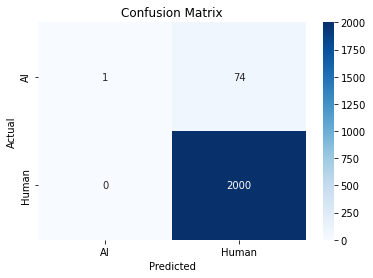

In [53]:
# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['AI', 'Human'], yticklabels=['AI', 'Human'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Cross-Validation Average Accuracy: 0.9981063458947256
Test Set Accuracy: 0.9792771084337349
Classification Report on Test Set:
               precision    recall  f1-score   support

          ai       0.82      0.55      0.66        75
       human       0.98      1.00      0.99      2000

    accuracy                           0.98      2075
   macro avg       0.90      0.77      0.82      2075
weighted avg       0.98      0.98      0.98      2075



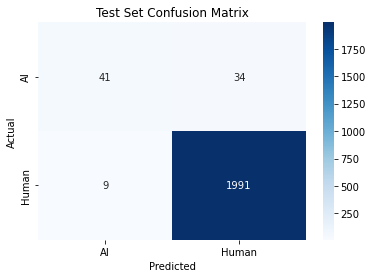

In [54]:
# 1 saat sürüyor

# Split data into training and testing sets
vectorizer = CountVectorizer(ngram_range=(1,2))
X_train = vectorizer.fit_transform(combined_train_df['text'])
X_test = vectorizer.transform(combined_test_df['text'])

y_train = combined_train_df['label'].values
y_test = combined_test_df['label'].values

# Initialize KFold for the training set only
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Lists to store results for each fold
accuracies = []
class_reports = []
conf_matrices = []

# Perform cross-validation on the training data only
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Train the model on the fold
    model.fit(X_train_fold, y_train_fold)
    
    # Make predictions on the validation fold
    predictions = model.predict(X_val_fold)
    
    # Metrics calculation
    accuracies.append(accuracy_score(y_val_fold, predictions))
    class_reports.append(classification_report(y_val_fold, predictions, output_dict=True))
    conf_matrices.append(confusion_matrix(y_val_fold, predictions))

# Evaluate the final model on the test set
final_predictions = model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)
final_class_report = classification_report(y_test, final_predictions)
final_conf_matrix = confusion_matrix(y_test, final_predictions)

# Display results
print("Cross-Validation Average Accuracy:", np.mean(accuracies))
print("Test Set Accuracy:", final_accuracy)
print("Classification Report on Test Set:\n", final_class_report)

# Display confusion matrix for the test set
sns.heatmap(final_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['AI', 'Human'], yticklabels=['AI', 'Human'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Test Set Confusion Matrix')
plt.show()